# Geospatial Well Lithology Prediction

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Data Prep

In [2]:
data = pd.read_csv('C:\\Users\\jboyl\\Documents\\GitHub\\mystic-bit\\data\\HACKA_DS.csv', sep=';')

In [3]:
data.head()

,PSEUDO_DEPTH,TEMP,CALI,GR,ILD,NPHI,RHOB,DT,TVD,TVDSS,...,PHIE,PHIT,SW,EF,PERFOS,RES_ID,WELL_ID,X,Y,HACKANAME
0,2074.53,87.19,10.31,55.08,3.3128,0.1678,2.3124,108.95,1588.62,1566.62,...,0.0591,0.2066,0.5863,5,0,3005,210075859,15,20.0,B03
1,2074.68,87.20,10.25,52.89,3.6592,0.1739,2.2895,110.91,1588.77,1566.77,...,0.0871,0.2222,0.5225,5,0,3005,210075859,15,20.0,B03
2,2074.83,87.20,10.20,52.54,4.1220,0.1618,2.2686,114.92,1588.92,1566.92,...,0.0730,0.2061,0.5004,5,0,3005,210075859,15,20.0,B03
3,2074.98,87.21,10.18,54.36,4.7189,0.1448,2.2533,119.66,1589.06,1567.06,...,0.0335,0.1768,0.4566,5,0,3005,210075859,15,20.0,B03
4,2075.90,87.24,9.76,48.13,13.0483,0.1085,2.0885,126.26,1589.94,1567.94,...,0.0331,0.1412,0.2211,1,1,3005,210075859,15,20.0,B03


In [4]:
data['RES_ID'].unique()

array([3005, 2900, 3001], dtype=int64)

## Geospatial Analysis

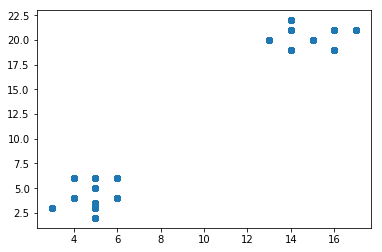

In [5]:
plt.scatter(data['X'], data['Y'])

In [6]:
data.shape

(12306, 21)

In [7]:
df = data.loc[(data['X'] < 8)]

In [8]:
df.shape

(7432, 21)

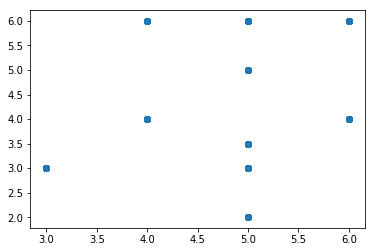

In [9]:
plt.scatter(df['X'], df['Y'])

# Initial Test Model

In [31]:
xs = pd.DataFrame()
xs['TVDSS'] = df['TVDSS      ']
xs['X'] = df['X']
xs['Y'] = df['Y']

In [32]:
xs.head()

,TVDSS,X,Y
4874,1616.97,6,6.0
4875,1617.10,6,6.0
4876,1617.23,6,6.0
4877,1617.36,6,6.0
4878,1617.49,6,6.0


In [33]:
y = pd.DataFrame()
y = df['RES_ID']

In [34]:
well_names = df['HACKANAME'].unique()
well_names

array(['G06', 'G08', 'G09', 'G10', 'G12', 'G15', 'G16', 'G070', 'B0700',
       'G17'], dtype=object)

In [35]:
def lowocv(xs, ys, wells, df, model):
    acc = []
    for well in wells:
        training_indicies = df.index[df['HACKANAME'] != well].tolist()
        test_indicies = df.index[df['HACKANAME'] == well].tolist()
        train_x = xs.loc[training_indicies]
        train_y = ys.loc[training_indicies]
        temp_model = model.fit(train_x, train_y)
        test_x = xs.loc[test_indicies]
        test_y = ys.loc[test_indicies]
        pred_y = temp_model.predict(test_x)
        acc.append(accuracy_score(test_y, pred_y))
    return acc

In [36]:
lin_mod = LogisticRegression()

In [37]:
accs = lowocv(xs, y, well_names, df, lin_mod)

d:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [38]:
print(accs)

[0.710261569416499, 0.6, 1.0, 0.8900523560209425, 1.0, 1.0, 0.9401709401709402, 1.0, 1.0, 1.0]


In [39]:
print(well_names)

['G06' 'G08' 'G09' 'G10' 'G12' 'G15' 'G16' 'G070' 'B0700' 'G17']


In [40]:
av_acc = sum(accs) / len(accs)
av_acc

0.9140484865608383

In [44]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(3), LogisticRegression())

In [45]:
accs = lowocv(xs, y, well_names, df, poly_model)

d:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [46]:
av_acc = sum(accs) / len(accs)
av_acc

0.9140484865608383

## WDRID

In [ ]:
test = df
test.dtypes

In [ ]:
test = test.drop('HACKANAME', axis=1)
test = test.drop('WELL_ID', axis=1)
test = test.drop('RES_ID', axis=1)
test = test.drop('PSEUDO_DEPTH', axis=1)
test = test.drop('TVD        ', axis=1)
test = test.drop('CALI       ', axis=1)
test = test.drop('TEMP       ', axis=1)
test = test.drop('TVDSS      ', axis=1)
test = test.drop('TVD        ', axis=1)
test = test.drop('CALI       ', axis=1)
test.head()

In [ ]:
lin_mod = LogisticRegression()

In [ ]:
accs = lowocv(test, y, well_names, lin_mod)

In [ ]:
print(accs)

In [ ]:
av_acc = sum(accs) / len(accs)
av_acc

In [ ]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(test, y)
# display the relative importance of each attribute
print(model.feature_importances_)

In [ ]:
list(test)

In [ ]:
test1 = pd.DataFrame()
test1['GR'] = data['GR         ']

In [ ]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(test1, data['RES_ID'])
# display the relative importance of each attribute
print(model.feature_importances_)

In [ ]:
lin_mod = LogisticRegression()

In [ ]:
w2 = data['HACKANAME'].unique()
w2

In [ ]:
y2 = pd.DataFrame()
y2['RES_ID'] = data['RES_ID']

In [ ]:
test1.describe()

In [ ]:
accs = lowocv(test1, y2, w2, data, lin_mod)

In [ ]:
print(accs)

In [ ]:
av_acc = sum(accs) / len(accs)
av_acc

In [ ]:
list(w2)

In [ ]:
from sklearn import svm

In [ ]:
C = 1.0

In [ ]:
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

In [ ]:
poly_svc = svm.SVC(kernel='poly', degree=3)

In [ ]:
accs = lowocv(test1, y2, w2, data, poly_svc)

In [ ]:
print(accs)

In [ ]:
av_acc = sum(accs) / len(accs)
av_acc